# Ruckig and ScurveGenertor 

In [2]:
from pyScurveGenerator import *
from math import *
from copy import copy
from pathlib import Path
from sys import path
from draw_functions import *
import time
from ruckig import InputParameter, OutputParameter, Result, Ruckig, Synchronization, ControlInterface, DurationDiscretization
def walk_through_trajectory(otg, inp):
    out_list = []
    out = OutputParameter(inp.degrees_of_freedom)

    res = Result.Working
    while res == Result.Working:
        res = otg.update(inp, out)

        out.pass_to_input(inp)
        out_list.append(copy(out))

    return out_list

# initial Value

In [3]:
dof = 1
dt = 0.00001
so = 0.0
sf = 1.0
vo = 0.0
vf = 32.11866322127771
ao = 0.0
af = 2750
vmax = 615.8028722
amax = 5864.8019024
dmax = 5864.8019024
j = 120000.17701177011

# Scurve Generator

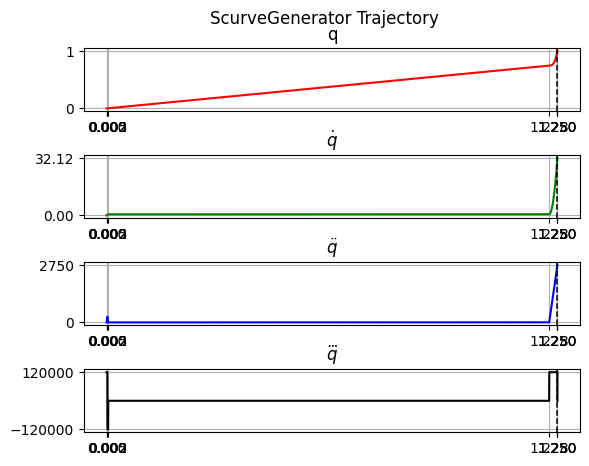

In [4]:
traj = Trajectory()
traj.so = so;
traj.sf = sf;
traj.vo = vo;
traj.vf = vf;
traj.ao = ao;
traj.af = af;
traj.vmax = vmax;
traj.amax = amax;
traj.dmax = dmax;
traj.j = j;
sg = ScurveGenerator([traj])
#sg.printAllTrajectory()
#sg.syncTargetTime(6)
drawScurveGenerator(sg,dt)

# Find Minimum Jerk Limit

In [5]:
import time
for j_ in np.linspace(0,10000000,1000):
    traj = Trajectory()
    traj.so = so;
    traj.sf = sf;
    traj.vo = vo;
    traj.vf = vf;
    traj.ao = ao;
    traj.af = af;
    traj.vmax = vmax;
    traj.amax = amax;
    traj.dmax = dmax;
    traj.j = j_;
    sg = []
    sg = ScurveGenerator([traj])
    traj = sg.getTraj(0)
    
    try:
        ds_list = []
        for i in range(int(traj.tt/dt)):
            t = i*dt
            val = sg.generate(traj,t)
            ds_list.append(val[1])
        print(np.min(ds_list))
        print(traj.tc)
        if np.min(ds_list)>=0 and abs(traj.tc)>1e-15 and traj.tc>0 and  (traj.tca1)>=0and  (traj.tca2)>=0 :
            break;                
    except:
        pass
    print("Jerk : ", j_)
j_limit = j_    
print("j_limit",j_limit)


Jerk :  0.0
Jerk :  10010.01001001001
Jerk :  20020.02002002002
Jerk :  30030.03003003003
Jerk :  40040.04004004004
Jerk :  50050.05005005005
Jerk :  60060.06006006006
Jerk :  70070.07007007007
Jerk :  80080.08008008008
Jerk :  90090.09009009009
Jerk :  100100.1001001001
Jerk :  110110.11011011011
-606.2915607927317
-0.15434126605082152
Jerk :  120120.12012012012
0.0
0.2338203657638545
j_limit 130130.13013013013


# Ruckig Trajectory

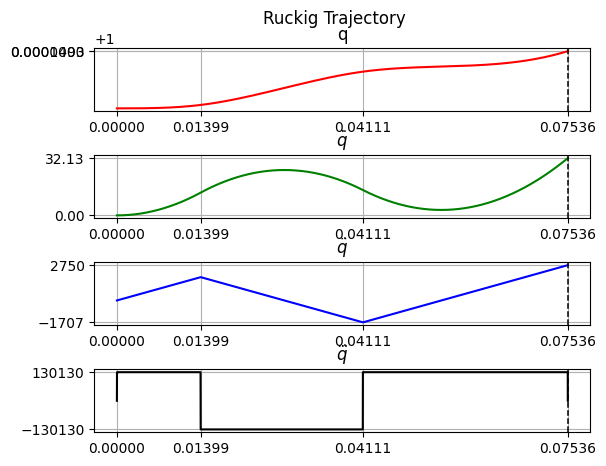


out.new_position = [1.000149324577226]
out.new_velocity = [32.13144584821229]
out.new_acceleration = [2749.999999999999]
out.time = [0.07536000000000348]
out.calculation_duration = [0.198]



In [6]:
ruckig = Ruckig(dof, dt)
inp = InputParameter(ruckig.degrees_of_freedom)
inp.current_position = [so]
inp.current_velocity = [vo]
inp.current_acceleration = [ao]
inp.target_position = [sf]
inp.target_velocity = [vf]
inp.target_acceleration = [af]
inp.max_velocity = [vmax]
inp.max_acceleration = [amax]
inp.max_jerk = [j_limit]
otg = Ruckig(inp.degrees_of_freedom, dt)
out_list = walk_through_trajectory(otg, inp)
drawRuckig(inp,otg,out_list)
print(out_list[-1])

# Ruckig & ScurveGenerator

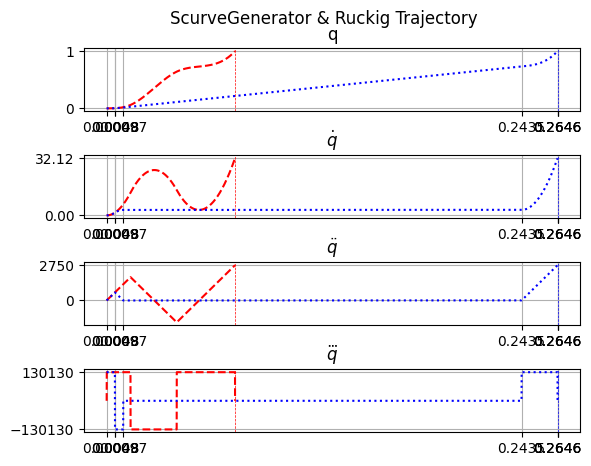

In [7]:
drawRuckigWithScurveGenerator(inp,otg,out_list,sg,dt)

# Ruckig final value error

In [ ]:
sf_error = np.array(out_list[-1].new_position) - sf
vf_error = np.array(out_list[-1].new_velocity) - vf
af_error = np.array(out_list[-1].new_acceleration) - af

print("sf_error",sf_error)
print(vf_error)
print(af_error)